# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [136]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [137]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [152]:
api_key = "889938d5b4605cd6577d9f925e263119"
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

record_count_in_set=0
set_count=0


print("Beginning Data Retrieval")
print("------------")

all_city_data = []
index = 0
for city_name in cities:
    if (index % 50 == 0):
        set_count += 1
        record_count_in_set = 0
    
    city_url = url + "&q=" + city_name
    try:
        response = requests.get(city_url).json()
    
#     print(response)
        city_lat=response['coord']['lat']
        city_lng=response["coord"]['lon']
        city_max_temp=response['main']['temp']
        city_humidity = response['main']['humidity']
        city_cloudiness= response['clouds']['all']
        city_wind_speed = response['wind']['speed']
        city_date = response['dt']
        city_country = response["sys"]["country"]
        
        data = {
            'Cities': city_name,             
            'Cloudiness': city_cloudiness,
            'Country': city_country,
            'Date': city_date,
            'Humidity' :city_humidity,
            'Lat':city_lat,
            'Lng': city_lng,
            'Max Temp': city_max_temp,
            'Wind Speed':city_wind_speed
            }

#         cities_df.loc[index, 'Lat'] =city_lat
#         cities_df.loc[index, 'Lng'] =city_lng
#         cities_df.loc[index, 'Max Temp']=city_max_temp
#         cities_df.loc[index, 'Humidity']=city_humidity
#         cities_df.loc[index, 'Cloudiness'] =city_cloudiness
#         cities_df.loc[index, 'Wind Speed'] =city_wind_speed
#         cities_df.loc[index, 'Date'] =city_date
#         cities_df.loc[index, 'Country']=city_country
        
        print("Processing Record %s of Set %s | %s" % (record_count_in_set, set_count, city_name))
        record_count_in_set +=1
        index +=1
        all_city_data.append(data)
        
    except (KeyError, IndexError):
        print("City not found, skipping...")


Beginning Data Retrieval
------------
Processing Record 0 of Set 1 | esperance
Processing Record 1 of Set 1 | troitsko-pechorsk
Processing Record 2 of Set 1 | tessalit
Processing Record 3 of Set 1 | atuona
Processing Record 4 of Set 1 | kaoma
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | saint-philippe
Processing Record 7 of Set 1 | elizabeth city
Processing Record 8 of Set 1 | chiredzi
Processing Record 9 of Set 1 | plettenberg bay
Processing Record 10 of Set 1 | hasaki
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | jaumave
Processing Record 13 of Set 1 | libertador general san martin
Processing Record 14 of Set 1 | campbell river
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | dwarka
City not found, skipping...
City not found, skipping...
Processing Record 17 of Set 1 | changde
Processing Record 18 of Set 1 | jizan
Processing Record 19 of Set 1 | bethel
Processing Record 20 of Set 1 | muyezerskiy
Processing

Processing Record 36 of Set 4 | pevek
Processing Record 37 of Set 4 | sarankhola
City not found, skipping...
Processing Record 38 of Set 4 | portland
City not found, skipping...
Processing Record 39 of Set 4 | lavrentiya
Processing Record 40 of Set 4 | waipawa
Processing Record 41 of Set 4 | craig
Processing Record 42 of Set 4 | le port
Processing Record 43 of Set 4 | hay river
Processing Record 44 of Set 4 | touros
Processing Record 45 of Set 4 | garowe
Processing Record 46 of Set 4 | kpandu
Processing Record 47 of Set 4 | santo domingo
Processing Record 48 of Set 4 | shache
Processing Record 49 of Set 4 | fare
Processing Record 0 of Set 5 | vardo
Processing Record 1 of Set 5 | todos santos
Processing Record 2 of Set 5 | ternate
Processing Record 3 of Set 5 | towson
Processing Record 4 of Set 5 | kieta
Processing Record 5 of Set 5 | airai
Processing Record 6 of Set 5 | fillan
Processing Record 7 of Set 5 | brae
Processing Record 8 of Set 5 | salamanca
Processing Record 9 of Set 5 | yu

Processing Record 19 of Set 9 | biltine
Processing Record 20 of Set 9 | san andres
Processing Record 21 of Set 9 | srandakan
Processing Record 22 of Set 9 | cartagena
Processing Record 23 of Set 9 | cabadiangan
Processing Record 24 of Set 9 | kushiro
Processing Record 25 of Set 9 | watertown
City not found, skipping...
Processing Record 26 of Set 9 | namibe
Processing Record 27 of Set 9 | gulu
Processing Record 28 of Set 9 | dakoro
Processing Record 29 of Set 9 | dunedin
Processing Record 30 of Set 9 | dali
Processing Record 31 of Set 9 | hearst
Processing Record 32 of Set 9 | ben tre
Processing Record 33 of Set 9 | sangar
Processing Record 34 of Set 9 | hella
Processing Record 35 of Set 9 | tikhvin
Processing Record 36 of Set 9 | haines junction
Processing Record 37 of Set 9 | lamu
Processing Record 38 of Set 9 | klaksvik
Processing Record 39 of Set 9 | chuy
Processing Record 40 of Set 9 | dikson
Processing Record 41 of Set 9 | flinders
Processing Record 42 of Set 9 | wiarton
Processi

Processing Record 4 of Set 13 | hammerfest
City not found, skipping...
City not found, skipping...
Processing Record 5 of Set 13 | walvis bay
Processing Record 6 of Set 13 | otavi
Processing Record 7 of Set 13 | bosaso
Processing Record 8 of Set 13 | iranshahr
Processing Record 9 of Set 13 | tavricheskoye
Processing Record 10 of Set 13 | tamandare


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [176]:
cities_df = pd.DataFrame(all_city_data)
cities_df.to_csv(output_data_file)

cities_df.count()

Cities        561
Cloudiness    561
Country       561
Date          561
Humidity      561
Lat           561
Lng           561
Max Temp      561
Wind Speed    561
dtype: int64

In [154]:
cities_df.head()

,Cities,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,esperance,20,TT,1536890400,83,10.24,-61.45,80.60,4.70
1,troitsko-pechorsk,92,RU,1536894534,99,62.71,56.19,48.16,5.95
2,tessalit,12,ML,1536894534,26,20.20,1.01,76.87,2.59
3,atuona,0,PF,1536894535,99,-9.80,-139.03,79.84,16.91
4,kaoma,0,ZM,1536894490,40,-14.80,24.80,59.68,10.54


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

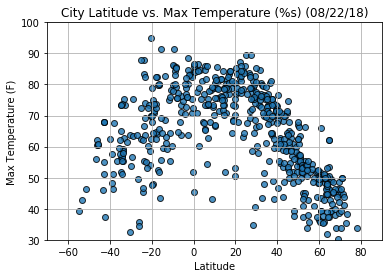

In [172]:
Lat = cities_df["Lat"]
Max_Temp = cities_df["Max Temp"]

plt.scatter(Lat,
            Max_Temp, 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Max Temperature (%s) (08/22/18)" )
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.xlim(-70, 90)
plt.ylim(30, 100)
plt.grid()

plt.savefig("output_data/Latitude_Max_temp.png")

plt.show()


#### Latitude vs. Humidity Plot

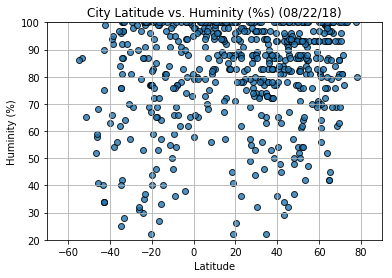

In [173]:
Lat = cities_df["Lat"]
Humidity = cities_df["Humidity"]


plt.scatter(Lat, 
            Humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Huminity (%s) (08/22/18)" )
plt.ylabel("Huminity (%)")
plt.xlabel("Latitude")
plt.xlim(-70, 90)
plt.ylim(20, 100)
plt.grid()

plt.savefig("output_data/Latitude_Humidity.png")

plt.show()


#### Latitude vs. Cloudiness Plot

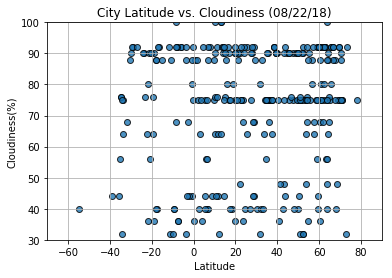

In [174]:
Lat = cities_df["Lat"]
Cloudiness = cities_df["Cloudiness"]


plt.scatter(Lat, 
            Cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Cloudiness (08/22/18)" )
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.xlim(-70, 90)
plt.ylim(30, 100)
plt.grid()

plt.savefig("output_data/Latitude_Cloudiness.png")

plt.show()


#### Latitude vs. Wind Speed Plot

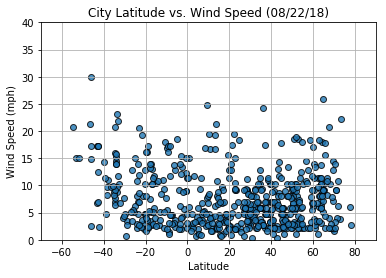

In [175]:
Lat = cities_df["Lat"]
Wind_Speed = cities_df["Wind Speed"]


plt.scatter(Lat, 
            Wind_Speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Wind Speed (08/22/18)" )
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.xlim(-70, 90)
plt.ylim(0, 40)
plt.grid()

plt.savefig("output_data/Latitude_Wind_Speed.png")

plt.show()
